# Analysis 2e6 muons by CJ - ROI cut
In this notebook, we will see the last data from CJ. Only the entries within the ROI are considered. The ROI is defined as follows:
- `x`, `y` in `[-500, +500]`
- `z` in `[-1000, +1000]`

The file after the cut has `9324212` entries and `11077` events.

In [29]:
import pandas as pd
import os

dir_in = os.path.join("..", "Data", "cutROI")
#files = ["output2eROI_part1.csv", "output2eROI_part2.csv", "output2eROI_part3.csv", "output2eROI_part4.csv", "output2eROI_part5.csv"]
#df = pd.read_csv(os.path.join(dir_in, files[0]), index_col=False)
#for file in files[1:]:
#    dfi = pd.read_csv(os.path.join(dir_in, file), index_col=False)
#    df = pd.concat([df, dfi])
#df.head()

new_file = "output2eROI_all_wt_ops.csv"
df = pd.read_csv(os.path.join(dir_in, new_file), index_col=False)

In [30]:
print("[Info] Number of entries: {}".format(df.shape[0]))
print("[Info] Number of distinct events: {}".format(df.eventnumber.nunique()))
df.head()

[Info] Number of entries: 9324212
[Info] Number of distinct events: 11077


,Unnamed: 0,Unnamed: 0.1,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID,OPs
0,0,0,22,341,0.00000,174.972,43.8606,491.864,275.561,-885.022,-0.464690,-0.633466,-0.618696,210,1123,eBrem,0,0.0
1,1,1,22,341,0.00000,171.427,44.0266,468.746,244.047,-915.800,-0.604181,-0.731574,-0.315855,210,1123,eBrem,0,0.0
2,2,2,22,341,3.20630,0.000,44.3455,410.980,174.100,-946.000,-0.604181,-0.731574,-0.315855,210,1123,eBrem,0,0.0
3,3,3,11,1123,168.22100,0.000,44.3460,411.045,174.073,-946.066,0.673383,-0.283750,-0.682672,210,1590,phot,0,0.0
4,4,4,11,1123,3.54527,0.000,44.0266,468.747,244.047,-915.800,0.369252,0.241678,-0.897355,210,1589,compt,0,0.0


In [31]:
edep_gb = df.groupby("eventnumber").energydeposition.sum().reset_index()
stats = edep_gb.energydeposition.describe()
stats

count    1.107700e+04
mean     3.281521e+05
std      1.707332e+06
min      0.000000e+00
25%      1.501759e+03
50%      1.272726e+05
75%      3.599918e+05
max      1.429126e+08
Name: energydeposition, dtype: float64

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

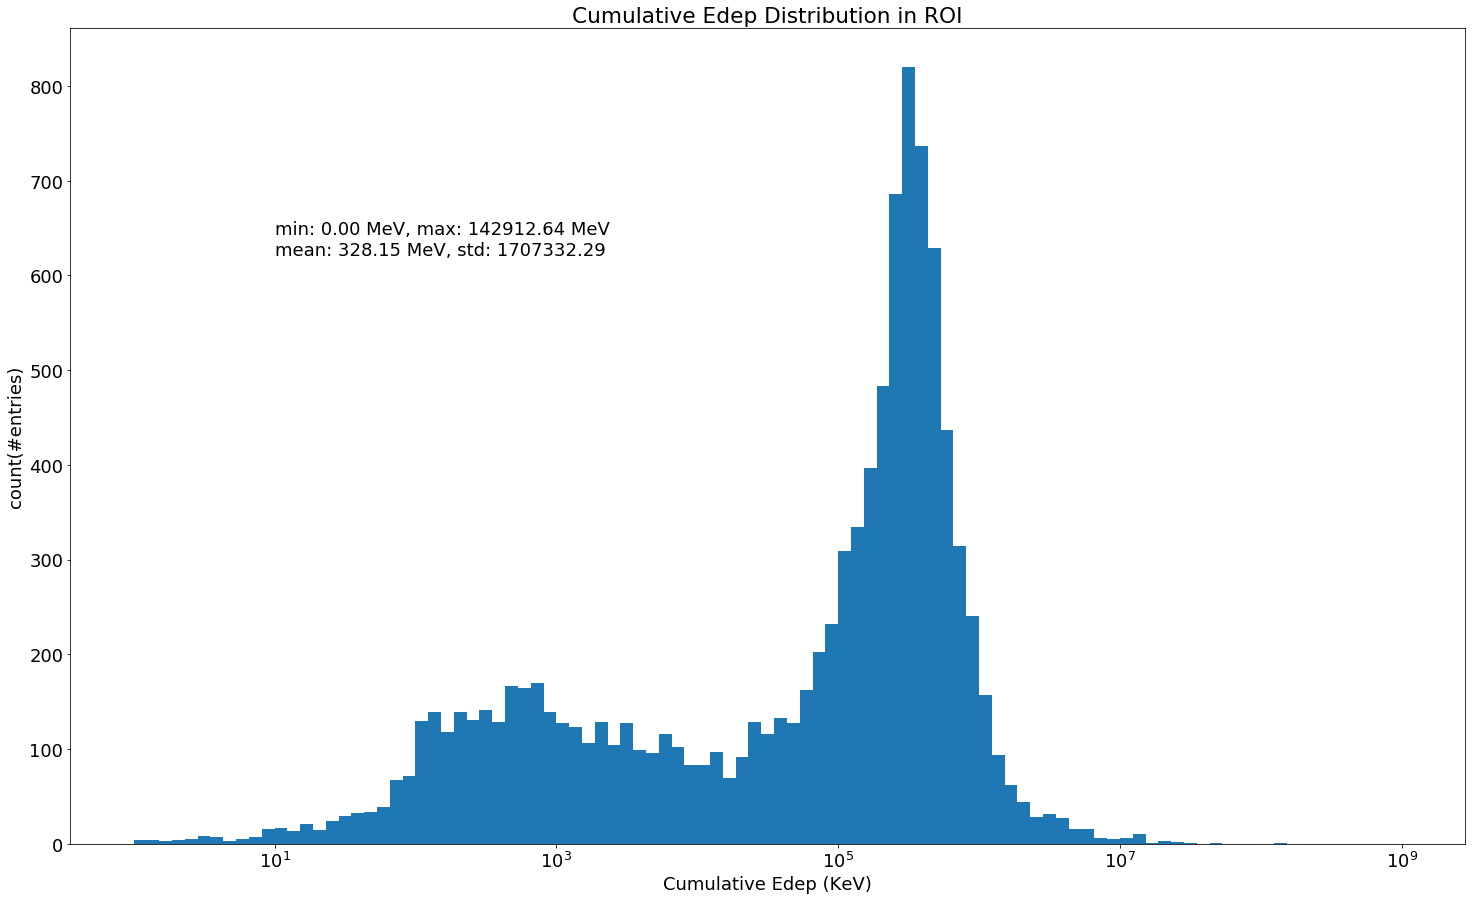

In [33]:
label = "min: {:.2f} MeV, max: {:.2f} MeV\n".format(stats.loc["min"], stats.loc["max"]/1000)
label += "mean: {:.2f} MeV, std: {:.2f}\n".format(stats.loc["mean"]/1000, stats.loc["std"])

bins = np.logspace(0, 9, 100)
plt.hist(edep_gb.energydeposition, bins)
plt.title("Cumulative Edep Distribution in ROI")
plt.xlabel("Cumulative Edep (KeV)")
plt.ylabel("count(#entries)")
plt.xscale('log')
plt.text(10, 600, label)
plt.show()

# Analysis OP counter

In [36]:
op_yield = 40
df["OPcounter"] = df.energydeposition * op_yield * df.OPs

opcounter_gb = df.groupby("eventnumber").OPcounter.sum().reset_index()
stats_opcounter = opcounter_gb.OPcounter.describe()
stats_opcounter

count    1.107700e+04
mean     9.258191e+04
std      6.401709e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.711811e+02
75%      8.187653e+04
max      4.498619e+07
Name: OPcounter, dtype: float64

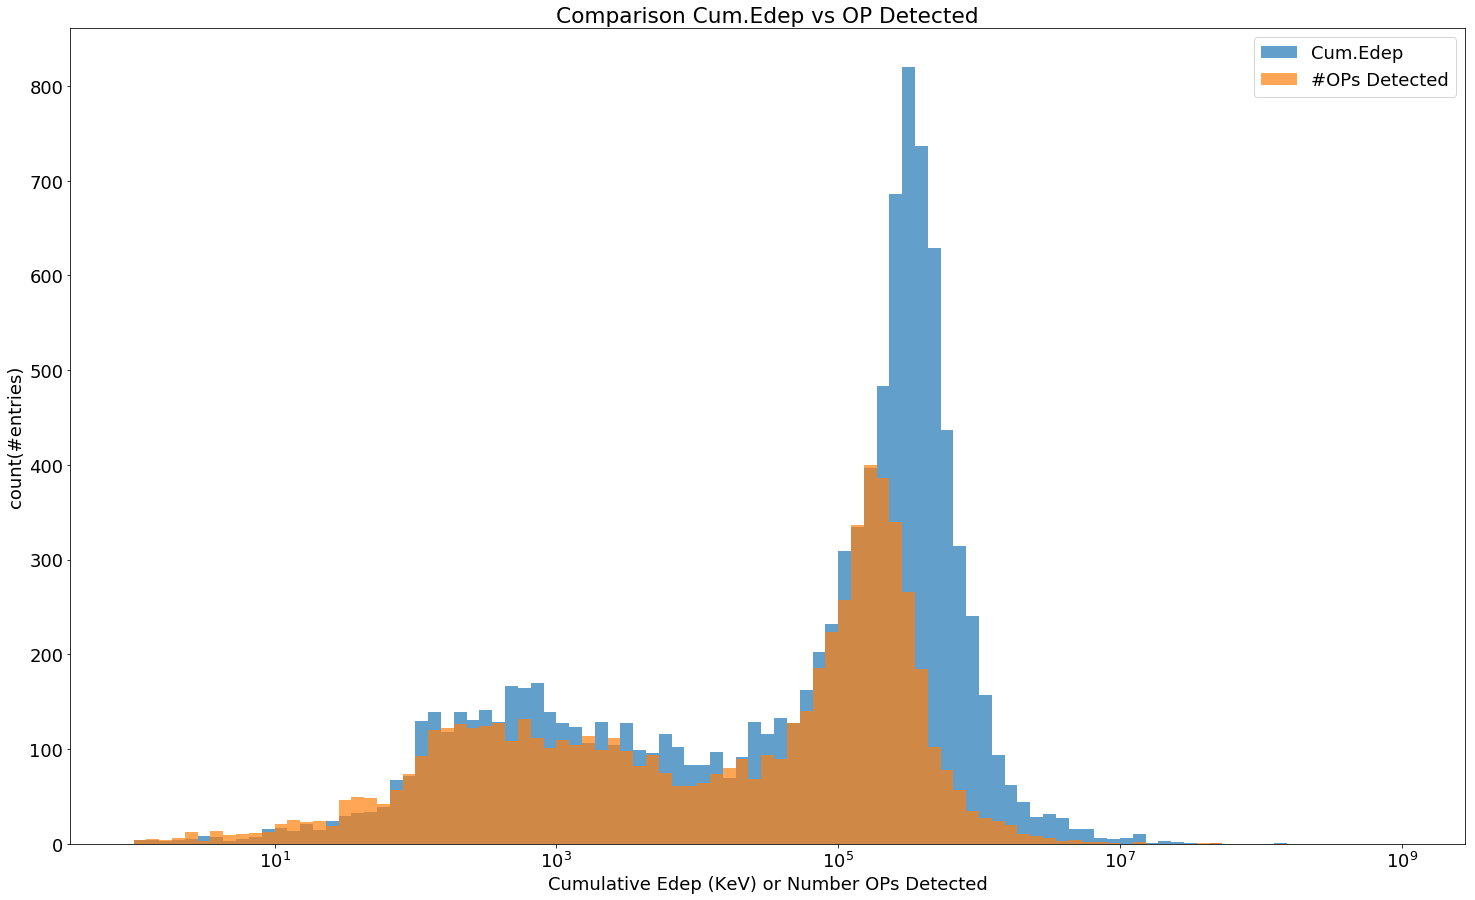

In [38]:
label = "min: {:.2f}, max: {:.2f}\n".format(stats_opcounter.loc["min"], stats_opcounter.loc["max"]/1000)
label += "mean: {:.2f}, std: {:.2f}\n".format(stats_opcounter.loc["mean"]/1000, stats_opcounter.loc["std"])

bins = np.logspace(0, 9, 100)

# histo edep
plt.hist(edep_gb.energydeposition, bins, alpha=0.7, label="Cum.Edep")
# histo op counter
plt.hist(opcounter_gb.OPcounter, bins, alpha=0.7, label="#OPs Detected")

# layout
plt.title("Comparison Cum.Edep vs OP Detected")
plt.xlabel("Cumulative Edep (KeV) or Number OPs Detected")
plt.ylabel("count(#entries)")
plt.xscale('log')
plt.legend()
plt.show()